In [72]:
# Import Dependencies
import pandas as pd 
import numpy
import requests
import json
import datetime as dt
from sqlalchemy import create_engine

# From open data to retrieve lat and lon of station_id 

In [73]:
url = "https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information"
print(requests.get(url))

<Response [200]>


In [74]:
# Pretty Print the output of the JSON
response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))
station_id = response['data']['stations'][0]['station_id']
lat = response['data']['stations'][0]['lat']
lon = response['data']['stations'][0]['lon']
capacity=response['data']['stations'][0]['capacity']

In [75]:
# Retrieve data: station_id, lat, lon, capacity
stations = response['data']['stations']
lat = response['data']['stations']
lon = response['data']['stations']
capacity = response['data']['stations']

station_id = []
station_name =[]
lats = []
lons = []
capacity = []
for station in stations: 
    #print(station["station_id"])
    station_id.append(station["station_id"])
    station_name.append(station["name"])
    lats.append(station['lat'])
    lons.append(station['lon'])
    capacity.append(station['capacity'])
    

In [76]:
# Create data frame 
station_coordinate = pd.DataFrame({"station_id":station_id,"station_name":station_name,"lat":lats,"lon":lons,"capacity":capacity}).copy()
station_coordinate

,station_id,station_name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647992,-79.370907,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,10
...,...,...,...,...,...
459,7506,Berkeley St / Adelaide St E - SMART,43.653359,-79.365023,12
460,7508,Berkeley St / Dundas St E - SMART,43.658816,-79.367318,18
461,7509,Ontario St / King St E,43.651814,-79.366194,19
462,7510,Princes' Blvd / Nunavut Rd,43.633225,-79.414319,19


In [77]:
# Create data frame 
stations = pd.DataFrame({"station_id":station_id,"station_name":station_name,"lat":lats,"lon":lons,"capacity":capacity})
#stations = stations.set_index(['station_id'])
stations

,station_id,station_name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647992,-79.370907,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,10
...,...,...,...,...,...
459,7506,Berkeley St / Adelaide St E - SMART,43.653359,-79.365023,12
460,7508,Berkeley St / Dundas St E - SMART,43.658816,-79.367318,18
461,7509,Ontario St / King St E,43.651814,-79.366194,19
462,7510,Princes' Blvd / Nunavut Rd,43.633225,-79.414319,19


In [78]:
# Save to csv
stations.to_csv("../stations.csv",index=False,header=True)

In [79]:
From_station=stations[['station_id','lat','lon']].rename(columns={'station_id':'from_station_id','lat':'origin_lat','lon':'origin_lon'})
From_station.head().reset_index()

,index,from_station_id,origin_lat,origin_lon
0,0,7000,43.639832,-79.395954
1,1,7001,43.647992,-79.370907
2,2,7002,43.667333,-79.399429
3,3,7003,43.667158,-79.402761
4,4,7004,43.656518,-79.389099


In [80]:
To_station=stations[['station_id','lat','lon']].rename(columns={'station_id':'to_station_id','lat':'destination_lat','lon':'destination_lon'})
To_station.head().reset_index()

,index,to_station_id,destination_lat,destination_lon
0,0,7000,43.639832,-79.395954
1,1,7001,43.647992,-79.370907
2,2,7002,43.667333,-79.399429
3,3,7003,43.667158,-79.402761
4,4,7004,43.656518,-79.389099


In [81]:
stations.dtypes

station_id       object
station_name     object
lat             float64
lon             float64
capacity          int64
dtype: object

In [82]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

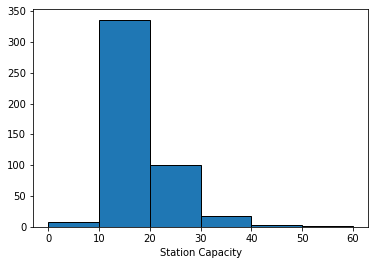

In [83]:
# Analysis of Station Cpacity
bins= [0,10,20,30,40,50,60]
plt.hist(stations['capacity'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel("Station Capacity")
           
plt.show()

In [84]:
# Top 10 Station listing
stations.sort_values('capacity',ascending=False,inplace=True)
stations.head(10)

,station_id,station_name,lat,lon,capacity
30,7030,Bay St / Wellesley St W,43.664088,-79.387095,51
48,7048,Front St W / Yonge St (Hockey Hall of Fame),43.646144,-79.377962,47
386,7426,Fleet St / Garrison Rd (Fort York),43.636804,-79.408832,42
37,7037,Bathurst St / Dundas St W,43.652300,-79.405800,40
361,7398,York St / Harbour St,43.641160,-79.379790,39
67,7067,Yonge St / Harbour St,43.643795,-79.375413,39
430,7472,Dundas St E / Victoria St,43.656333,-79.379114,39
24,7024,Dundonald St / Church St,43.666630,-79.381480,36
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
21,7021,Bay St / Albert St,43.653264,-79.382458,35


In [85]:
stations.describe()

,lat,lon,capacity
count,464.000000,464.000000,464.000000
mean,43.660052,-79.390048,18.030172
std,0.016518,0.039893,5.924576
min,43.618680,-79.486740,0.000000
25%,43.647909,-79.414405,15.000000
50%,43.658775,-79.389586,17.000000
75%,43.669353,-79.371628,20.000000
max,43.716652,-79.281455,51.000000


# Import and clean the quarterly bikeshare files

In [86]:
quarter_one_file_path = "2017 Data/Bikeshare Ridership (2017 Q1).csv"
quarter_one = pd.read_csv(quarter_one_file_path)
quarter_one.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [87]:
quarter_two_file_path = "2017 Data/Bikeshare Ridership (2017 Q2).csv"
quarter_two = pd.read_csv(quarter_two_file_path)
quarter_two.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,868665,1/4/2017 0:01,1/4/2017 0:06,297,7073,Bremner Blvd / Spadina Ave,7211,Fort York Blvd / Garrison Rd,Member
1,868666,1/4/2017 0:07,1/4/2017 0:11,236,7038,Dundas St / Yonge St,7163,Yonge St / Wood St,Member
2,868667,1/4/2017 0:08,1/4/2017 0:14,380,7012,Elizabeth St / Edward St (Bus Terminal),7069,Queen St W / Spadina Ave,Member
3,868668,1/4/2017 0:12,1/4/2017 0:34,1299,7172,Strachan Ave / Princes' Blvd,7069,Queen St W / Spadina Ave,Member
4,868669,1/4/2017 0:13,1/4/2017 0:18,323,7039,Simcoe St / Dundas St W,7021,Bay St / Albert St,Member


In [88]:
# Merge quarter_one and quarter_two
first_half_year = pd.concat([quarter_one,quarter_two])

# Change to datetime 
first_half_year['trip_start_time'] = pd.to_datetime(first_half_year['trip_start_time'],format = '%d/%m/%Y %H:%M')
first_half_year['trip_stop_time'] = pd.to_datetime(first_half_year['trip_stop_time'],format = '%d/%m/%Y %H:%M')
first_half_year.dropna()
first_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [89]:
first_half_year.dtypes

trip_id                           int64
trip_start_time          datetime64[ns]
trip_stop_time           datetime64[ns]
trip_duration_seconds             int64
from_station_id                   int64
from_station_name                object
to_station_id                     int64
to_station_name                  object
user_type                        object
dtype: object

In [90]:
quarter_three_file_path = "2017 Data/Bikeshare Ridership (2017 Q3).csv"
quarter_three = pd.read_csv(quarter_three_file_path)

#Change trip_start_time and trip_stop_time to datetime 
quarter_three['trip_start_time'] = pd.to_datetime(quarter_three['trip_start_time'],format = '%m/%d/%Y %H:%M')
quarter_three['trip_stop_time'] = pd.to_datetime(quarter_three['trip_stop_time'],format = '%m/%d/%Y %H:%M')
quarter_three.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


In [91]:
quarter_four_file_path = "2017 Data/Bikeshare Ridership (2017 Q4).csv"
quarter_four= pd.read_csv(quarter_four_file_path)
quarter_four = quarter_four.dropna()

#Change trip_start_time and trip_stop_time to datetime format 
quarter_four['trip_start_time'] = pd.to_datetime(quarter_four['trip_start_time'],format = '%m/%d/%y %H:%M:%S')
quarter_four['trip_stop_time'] = pd.to_datetime(quarter_four['trip_stop_time'],format = '%m/%d/%y %H:%M:%S')
quarter_four.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1971685,2017-10-01 00:00:01,2017-10-01 00:14:10,849,Queen St W / James St,Taddle Creek Park,Member
1,1971686,2017-10-01 00:00:01,2017-10-01 00:00:27,26,Stewart St / Bathurst St - SMART,Stewart St / Bathurst St - SMART,Casual
2,1971687,2017-10-01 00:00:22,2017-10-01 00:22:12,1310,Hayter St / Laplante Ave,Queen St W / Portland St,Member
3,1971688,2017-10-01 00:00:38,2017-10-01 00:11:09,631,Beverly St / College St,Beverly St / Dundas St W,Member
4,1971689,2017-10-01 00:00:55,2017-10-01 00:20:53,1198,Thompson St / Broadview Ave - SMART,Thompson St / Broadview Ave - SMART,Member


In [92]:
# Merge quarter_three and quarter_four
second_half_year = pd.concat([quarter_three,quarter_four])
second_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


In [93]:
# Insert station id to the second_half_year
add_station_ids = second_half_year.merge(stations, left_on = "from_station_name", right_on ="station_name", how = "left")\
   .merge(stations, left_on = "to_station_name", right_on ="station_name", how = "left")

add_station_ids.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type,station_id_x,station_name_x,lat_x,lon_x,capacity_x,station_id_y,station_name_y,lat_y,lon_y,capacity_y
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member,7060,Princess St / Adelaide St E,43.652123,-79.367139,19.0,7123,424 Wellington St W,43.643834,-79.396649,15.0
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual,NaN,NaN,NaN,NaN,NaN,7175,HTO Park (Queens Quay W),43.637960,-79.387502,27.0
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual,NaN,NaN,NaN,NaN,NaN,7175,HTO Park (Queens Quay W),43.637960,-79.387502,27.0
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,15.0,7096,Boston Ave / Queen St E,43.661508,-79.338931,19.0
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,15.0,7096,Boston Ave / Queen St E,43.661508,-79.338931,19.0


In [94]:
second_half_year = add_station_ids.copy()

#Rename columns name
second_half_year = second_half_year.rename(columns={"station_id_x": "from_station_id",
                                                    "station_id_y": "to_station_id"})

In [95]:
#Reposition columns
second_half_year = second_half_year[['trip_id',
                                     'trip_start_time', 
                                     'trip_stop_time',
                                     'trip_duration_seconds',
                                     'from_station_id',
                                     'from_station_name',
                                     'to_station_id', 
                                     'to_station_name', 
                                     'user_type']]

second_half_year = second_half_year.dropna()
second_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,7060,Princess St / Adelaide St E,7123,424 Wellington St W,Member
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,7012,Elizabeth St / Edward St (Bus Terminal),7096,Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,7012,Elizabeth St / Edward St (Bus Terminal),7096,Boston Ave / Queen St E,Casual
5,1253919,2017-07-01 00:03:00,2017-07-01 00:25:00,1332,7026,Bay St / St. Joseph St,7046,Niagara St / Richmond St W,Member
6,1253920,2017-07-01 00:04:00,2017-07-01 00:53:00,2930,7006,Bay St / College St (East Side),7038,Dundas St W / Yonge St,Casual


In [96]:
second_half_year.dtypes


trip_id                           int64
trip_start_time          datetime64[ns]
trip_stop_time           datetime64[ns]
trip_duration_seconds             int64
from_station_id                  object
from_station_name                object
to_station_id                    object
to_station_name                  object
user_type                        object
dtype: object

In [97]:
# Merge quarters to a year 
bike_share_2017 =  pd.concat([first_half_year ,second_half_year])
bike_share_2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...,...
1026884,2383639,2017-12-31 23:35:41,2017-12-31 23:54:33,1132,7033,Union Station,7100,Dundas St E / Regent Park Blvd,Member
1026885,2383640,2017-12-31 23:37:43,2017-12-31 23:43:00,317,7152,Ossington Ave / Bloor St W,7184,Ossington Ave / College St,Member
1026889,2383644,2017-12-31 23:47:40,2017-12-31 23:57:49,609,7132,Kendal Ave / Spadina Rd,7189,Augusta Ave / Denison Sq,Member
1026890,2383645,2017-12-31 23:49:08,2017-12-31 23:49:34,26,7020,Phoebe St / Spadina Ave,7020,Phoebe St / Spadina Ave,Member


In [98]:
bike_share_2017.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [99]:
bike_share_2017.to_csv("2017 Data/bike_share_2017.csv",index=False,header=True)

In [100]:
# Merged Station lat and lon to bike_share_2017
bike_share_2017["from_station_id"]=bike_share_2017["from_station_id"].astype(int)
From_station["from_station_id"]=From_station["from_station_id"].astype(int)
bike_share_2017_from = bike_share_2017.merge(From_station, on = "from_station_id", how = "left")
bike_share_2017_from.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052


In [101]:
bike_share_2017["to_station_id"]=bike_share_2017["to_station_id"].astype(int)
To_station["to_station_id"]=To_station["to_station_id"].astype(int)
bike_share_2017_to = bike_share_2017.merge(To_station, on = "to_station_id", how = "left")
bike_share_2017_to.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,destination_lat,destination_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.662712,-79.379903
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.666667,-79.411667
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.656389,-79.409167
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.645323,-79.395003
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.657763,-79.389165


In [102]:
bike_share_2017_to.to_csv("2017 Data/bike_share_2017_to.csv",index=False,header=True)

In [103]:
# Merged Station lat and lon to bike_share_2017

bike_share_final = pd.merge(bike_share_2017_from,bike_share_2017_to, on = "trip_id", how = "left")
bike_share_final.head()

,trip_id,trip_start_time_x,trip_stop_time_x,trip_duration_seconds_x,from_station_id_x,from_station_name_x,to_station_id_x,to_station_name_x,user_type_x,origin_lat,...,trip_start_time_y,trip_stop_time_y,trip_duration_seconds_y,from_station_id_y,from_station_name_y,to_station_id_y,to_station_name_y,user_type_y,destination_lat,destination_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,...,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.662712,-79.379903
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,...,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.666667,-79.411667
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,...,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.656389,-79.409167
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,...,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.645323,-79.395003
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,...,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.657763,-79.389165


In [108]:
bike_share_final=bike_share_final[['trip_id','trip_start_time_x',
                                   'trip_stop_time_x','trip_duration_seconds_x',
                                   'from_station_id_x','from_station_name_x',
                                   'to_station_id_x','to_station_name_x',
                                   'user_type_x','origin_lat','origin_lon',
                                   'destination_lat','destination_lon']]
bike_share_final = bike_share_final.rename(columns={"trip_start_time_x": "trip_start_time",
                                                    "trip_stop_time_x": "trip_stop_time",
                                                   'trip_duration_seconds_x':'trip_duration_seconds',
                                                   'from_station_id_x':'from_station_id',
                                                   'from_station_name_x':'from_station_name',
                                                   'to_station_id_x':'to_station_id',
                                                   'to_station_name_x':'to_station_name',
                                                   'user_type_x':'user_type'
                                                   })


bike_share_final.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon,destination_lat,destination_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570,43.662712,-79.379903
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317,43.666667,-79.411667
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333,43.656389,-79.409167
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767,43.645323,-79.395003
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052,43.657763,-79.389165


In [109]:
bike_share_final.isnull().sum()

trip_id                     0
trip_start_time             0
trip_stop_time              0
trip_duration_seconds       0
from_station_id             0
from_station_name           0
to_station_id               0
to_station_name             0
user_type                   0
origin_lat               3812
origin_lon               3812
destination_lat          4213
destination_lon          4213
dtype: int64

In [110]:
bike_share_final['origin_lat']=bike_share_final['origin_lat'].astype(float)
bike_share_final['origin_lon']=bike_share_final['origin_lon'].astype(float)
bike_share_final['destination_lat']=bike_share_final['destination_lat'].astype(float)
bike_share_final['destination_lon']=bike_share_final['destination_lon'].astype(float)

In [111]:
bike_share_final.dropna(how='any',inplace=True)

In [112]:
bike_share_final.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
origin_lat               0
origin_lon               0
destination_lat          0
destination_lon          0
dtype: int64

In [113]:
bike_share_final.to_csv("2017 Data/bike_share_final.csv",index=False,header=True)

In [114]:
#Transfer date to year_month_date format
bike_share_final['trip_start_time'] = pd.to_datetime(bike_share_final['trip_start_time'])

bike_share_final['Date'] = bike_share_final['trip_start_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
bike_share_final['Quarter'] = bike_share_final['trip_start_time'].apply(lambda x: int((int(x.strftime('%m')) - 1) / 3) + 1)
bike_share_final['Month'] = bike_share_final['trip_start_time'].apply(lambda x: x.strftime('%B'))
bike_share_final['Day of Week'] = bike_share_final['trip_start_time'].apply(lambda x: x.strftime('%a'))

bike_share_final.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon,destination_lat,destination_lon,Date,Quarter,Month,Day of Week
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570,43.662712,-79.379903,2017-01-01,1,January,Sun
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317,43.666667,-79.411667,2017-01-01,1,January,Sun
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333,43.656389,-79.409167,2017-01-01,1,January,Sun
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767,43.645323,-79.395003,2017-01-01,1,January,Sun
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052,43.657763,-79.389165,2017-01-01,1,January,Sun


In [115]:
# Create a "Route ID" in the "[start station ID]-[end station ID]" format
bike_share_final['route_id'] = bike_share_final.apply(lambda x: '{0}-{1}'.format(int(x['from_station_id']), int(x['to_station_id'])), axis=1)
# Extract the unique routes from the data with their start and end coordinates
maps = bike_share_final[['route_id', 'from_station_id', 'origin_lat', 'origin_lon', 'to_station_id', 'destination_lat', 'destination_lon']].drop_duplicates()
maps.head()

,route_id,from_station_id,origin_lat,origin_lon,to_station_id,destination_lat,destination_lon
0,7051-7089,7051,43.665060,-79.383570,7089,43.662712,-79.379903
1,7143-7154,7143,43.671513,-79.408317,7154,43.666667,-79.411667
2,7113-7199,7113,43.665278,-79.368333,7199,43.656389,-79.409167
3,7077-7010,7077,43.659777,-79.382767,7010,43.645323,-79.395003
4,7079-7047,7079,43.660694,-79.379052,7047,43.657763,-79.389165


In [116]:
maps.dropna(how='all',inplace=True)

In [117]:
maps.to_csv("2017 Data/maps.csv",index=False,header=True)

In [118]:
#Calculate Distance
from geopy import distance
maps['Distance(m)'] = round(maps.apply(lambda x: distance.distance((x['origin_lat'], x['origin_lon']), (x['destination_lat'], x['destination_lon'])).km*1000, axis=1),0)

In [119]:
maps.head()

,route_id,from_station_id,origin_lat,origin_lon,to_station_id,destination_lat,destination_lon,Distance(m)
0,7051-7089,7051,43.665060,-79.383570,7089,43.662712,-79.379903,394.0
1,7143-7154,7143,43.671513,-79.408317,7154,43.666667,-79.411667,602.0
2,7113-7199,7113,43.665278,-79.368333,7199,43.656389,-79.409167,3439.0
3,7077-7010,7077,43.659777,-79.382767,7010,43.645323,-79.395003,1885.0
4,7079-7047,7079,43.660694,-79.379052,7047,43.657763,-79.389165,878.0


In [120]:
# insert Distance to final data
bike_share_final['Distance']=maps['Distance(m)']
bike_share_final.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon,destination_lat,destination_lon,Date,Quarter,Month,Day of Week,route_id,Distance
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570,43.662712,-79.379903,2017-01-01,1,January,Sun,7051-7089,394.0
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317,43.666667,-79.411667,2017-01-01,1,January,Sun,7143-7154,602.0
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333,43.656389,-79.409167,2017-01-01,1,January,Sun,7113-7199,3439.0
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767,43.645323,-79.395003,2017-01-01,1,January,Sun,7077-7010,1885.0
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052,43.657763,-79.389165,2017-01-01,1,January,Sun,7079-7047,878.0


In [121]:
bike_share_final.to_csv("2017 Data/bike_share_final_v1.csv",index=False,header=True)

# Analysis and Visualization of 2017 Toronto Bike Share

In [122]:
grouped_by_day_frequency=bike_share_final.groupby(['Date','Quarter','Month'])['trip_id'].nunique().reset_index()
grouped_by_day_frequency.head()

,Date,Quarter,Month,trip_id
0,2017-01-01,1,January,482
1,2017-01-02,1,January,762
2,2017-01-03,1,January,909
3,2017-01-04,1,January,1340
4,2017-01-05,1,January,1182


In [123]:
grouped_by_day_sum=bike_share_final.groupby(['Date','Quarter','Month','Day of Week']).sum().reset_index()
grouped_by_day_sum.head()

,Date,Quarter,Month,Day of Week,trip_id,trip_duration_seconds,from_station_id,origin_lat,origin_lon,destination_lat,destination_lon,Distance
0,2017-01-01,1,January,Sun,343488834,408722,3412781,21041.230618,-38265.710541,21040.623507,-38265.471091,631796.0
1,2017-01-02,1,January,Mon,543583375,615313,5390546,33264.859271,-60494.925329,33264.769577,-60493.821435,956308.0
2,2017-01-03,1,January,Tue,649410453,580307,6427993,39682.534182,-72164.535394,39681.419133,-72164.696717,1202159.0
3,2017-01-04,1,January,Wed,959194412,888902,9475380,58497.619586,-106381.087591,58495.780297,-106379.616790,1312774.0
4,2017-01-05,1,January,Thu,847961342,722525,8356996,51600.871484,-93838.109451,51599.096849,-93836.348121,888299.0


In [124]:
grouped_df=pd.merge(grouped_by_day_frequency,grouped_by_day_sum, on='Date',how='left')
grouped_df.head().reset_index()

,index,Date,Quarter_x,Month_x,trip_id_x,Quarter_y,Month_y,Day of Week,trip_id_y,trip_duration_seconds,from_station_id,origin_lat,origin_lon,destination_lat,destination_lon,Distance
0,0,2017-01-01,1,January,482,1,January,Sun,343488834,408722,3412781,21041.230618,-38265.710541,21040.623507,-38265.471091,631796.0
1,1,2017-01-02,1,January,762,1,January,Mon,543583375,615313,5390546,33264.859271,-60494.925329,33264.769577,-60493.821435,956308.0
2,2,2017-01-03,1,January,909,1,January,Tue,649410453,580307,6427993,39682.534182,-72164.535394,39681.419133,-72164.696717,1202159.0
3,3,2017-01-04,1,January,1340,1,January,Wed,959194412,888902,9475380,58497.619586,-106381.087591,58495.780297,-106379.616790,1312774.0
4,4,2017-01-05,1,January,1182,1,January,Thu,847961342,722525,8356996,51600.871484,-93838.109451,51599.096849,-93836.348121,888299.0


In [125]:
grouped_df=grouped_df[['Date','Quarter_x','Month_x','trip_id_x','Day of Week','trip_duration_seconds','Distance']]
grouped_df = grouped_df.rename(columns={"Quarter_x": "Quarter",
                                                    "Month_x": "Month",'trip_id_x':'Frequency'})

grouped_df.head()

,Date,Quarter,Month,Frequency,Day of Week,trip_duration_seconds,Distance
0,2017-01-01,1,January,482,Sun,408722,631796.0
1,2017-01-02,1,January,762,Mon,615313,956308.0
2,2017-01-03,1,January,909,Tue,580307,1202159.0
3,2017-01-04,1,January,1340,Wed,888902,1312774.0
4,2017-01-05,1,January,1182,Thu,722525,888299.0


The mean distance is 502456.2876712329
The median distance is 372683.0
The mode distance is 372683.0


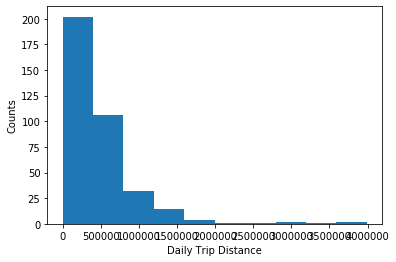

NormaltestResult(statistic=73.65914182257839, pvalue=1.0118603594542831e-16)
The population variance of Distance is 266437351083.21298
The population Distance is 516175.69788126694
Roughly 68% of the data is between -13719.41 and 1018631.986
Roughly 95% of the data is between -529895.108 and 1534807.683
Roughly 99.7% of the data is between -1046070.806 and 2050983.381


In [126]:
#Analysis Daily Trip Distance 
import scipy.stats as sts
import numpy as np
mean_distance= np.mean(grouped_df['Distance'])
print(f"The mean distance is {mean_distance}")
median_distance = np.median(grouped_df['Distance'])
print(f"The median distance is {median_distance}")
mode_distance = sts.mode(median_distance)
print(f"The mode distance is {median_distance}")

#To see distribution of distance
plt.hist(grouped_df['Distance'])
plt.xlabel('Daily Trip Distance')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(grouped_df['Distance'].sample(50)))

#The variance and standard deviation of distance
var_distance = np.var(grouped_df['Distance'],ddof = 0)
print(f"The population variance of Distance is {var_distance}")
sd_distance = np.std(grouped_df['Distance'],ddof = 0)
print(f"The population Distance is {sd_distance}")
print(f"Roughly 68% of the data is between {round(mean_distance-sd_distance,3)} and {round(mean_distance+sd_distance,3)}")
print(f"Roughly 95% of the data is between {round(mean_distance-2*sd_distance,3)} and {round(mean_distance+2*sd_distance,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_distance-3*sd_distance,3)} and {round(mean_distance+3*sd_distance,3)}")

The mean duration is 3332181.7205479452
The median duration is 2760112.0
The mode duration is 2760112.0


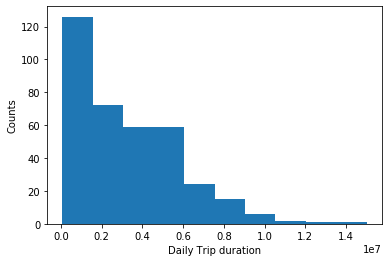

NormaltestResult(statistic=10.210744256863496, pvalue=0.0060640818779561356)
The population variance of duration is 6483417092109.489
The population standard deviation duration is 2546255.504090171
Roughly 68% of the data is between 785926.216 and 5878437.225
Roughly 95% of the data is between -1760329.288 and 8424692.729
Roughly 99.7% of the data is between -4306584.792 and 10970948.233


In [127]:
#Analysis Daily Trip Duration

mean_duration= np.mean(grouped_df['trip_duration_seconds'])
print(f"The mean duration is {mean_duration}")
median_duration = np.median(grouped_df['trip_duration_seconds'])
print(f"The median duration is {median_duration}")
mode_duration = sts.mode(median_duration)
print(f"The mode duration is {median_duration}")

#To see distribution of distance
plt.hist(grouped_df['trip_duration_seconds'])
plt.xlabel('Daily Trip duration')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(grouped_df['trip_duration_seconds'].sample(50)))

#The variance and standard deviation of distance
var_duration = np.var(grouped_df['trip_duration_seconds'],ddof = 0)
print(f"The population variance of duration is {var_duration}")
sd_duration = np.std(grouped_df['trip_duration_seconds'],ddof = 0)
print(f"The population standard deviation duration is {sd_duration}")
print(f"Roughly 68% of the data is between {round(mean_duration-sd_duration,3)} and {round(mean_duration+sd_duration,3)}")
print(f"Roughly 95% of the data is between {round(mean_duration-2*sd_duration,3)} and {round(mean_duration+2*sd_duration,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_duration-3*sd_duration,3)} and {round(mean_duration+3*sd_duration,3)}")

In [128]:
grouped_df['Ave_duration']=grouped_df['trip_duration_seconds']/grouped_df['Frequency']
grouped_df['Ave_disdance']=grouped_df['Distance']/grouped_df['Frequency']
grouped_df.head()

,Date,Quarter,Month,Frequency,Day of Week,trip_duration_seconds,Distance,Ave_duration,Ave_disdance
0,2017-01-01,1,January,482,Sun,408722,631796.0,847.970954,1310.780083
1,2017-01-02,1,January,762,Mon,615313,956308.0,807.497375,1254.997375
2,2017-01-03,1,January,909,Tue,580307,1202159.0,638.401540,1322.507151
3,2017-01-04,1,January,1340,Wed,888902,1312774.0,663.359701,979.682090
4,2017-01-05,1,January,1182,Thu,722525,888299.0,611.273266,751.521997


In [129]:
#Box plot to see outlier of Daily Ave Distance and Duration
distance = grouped_df["Ave_disdance"]
quartiles = distance.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ave_disdance is: {lowerq}")
print(f"The upper quartile of Ave_disdance is: {upperq}")
print(f"The interquartile range of Ave_disdance is: {iqr}")
print(f"The the median of Ave_disdance is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ave_disdance is: 66.1358254005108
The upper quartile of Ave_disdance is: 200.30674595037934
The interquartile range of Ave_disdance is: 134.17092054986853
The the median of Ave_disdance is: 123.62203198190922 
Values below -135.12055542429198 could be outliers.
Values above 401.5631267751821 could be outliers.


In [52]:
duration = grouped_df["Ave_duration"]
quartiles = duration.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ave_duration is: {lowerq}")
print(f"The upper quartile of Ave_duration is: {upperq}")
print(f"The interquartile range of Ave_duration is: {iqr}")
print(f"The the median of Ave_duration is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ave_duration is: 647.8805237315876
The upper quartile of Ave_duration is: 861.8611111111111
The interquartile range of Ave_duration is: 213.9805873795235
The the median of Ave_duration is: 718.660663507109 
Values below 326.9096426623023 could be outliers.
Values above 1182.8319921803964 could be outliers.


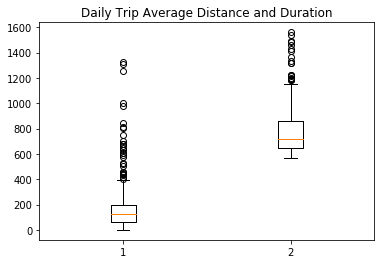

In [130]:
#Box plot to see outlier of Daily Trip Distance and duration
data = [distance, duration]
fig1, ax1 = plt.subplots()
ax1.set_title('Daily Trip Average Distance and Duration')
ax1.boxplot(data)

plt.show()

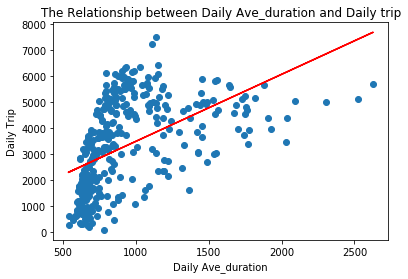

In [131]:
#Plot Daily Ave_duration versus Daily trip frequency on a scatterplot; Add the linear regression equation and line to plot
from scipy.stats import linregress
y_values = grouped_df["Frequency"]
x_values = grouped_df["Ave_duration"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,950),fontsize=15,color="red")
plt.ylabel('Daily Trip')
plt.xlabel('Daily Ave_duration')
plt.title("The Relationship between Daily Ave_duration and Daily trip")
plt.show()

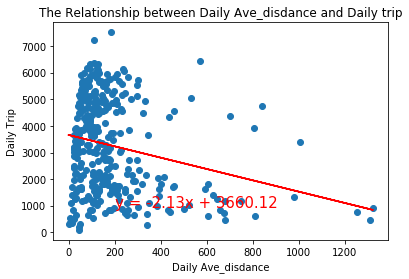

In [138]:
#Plot Daily Ave_duration versus Daily trip frequency on a scatterplot; Add the linear regression equation and line to plot
from scipy.stats import linregress
y_values = grouped_df["Frequency"]
x_values = grouped_df["Ave_disdance"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,950),fontsize=15,color="red")
plt.ylabel('Daily Trip')
plt.xlabel('Daily Ave_disdance')
plt.title("The Relationship between Daily Ave_disdance and Daily trip")
plt.show()

In [139]:
# Aggregate the ridership by date fields and user type and count the number of unique trips
ridership = bike_share_final.groupby(['Date', 'Quarter', 'Month', 'Day of Week', 'user_type'])['trip_id'].nunique().reset_index().sort_values('trip_id', ascending=False)
ridership.head()

,Date,Quarter,Month,Day of Week,user_type,trip_id
527,2017-09-21,3,September,Thu,Member,5295
525,2017-09-20,3,September,Wed,Member,5254
539,2017-09-27,3,September,Wed,Member,5191
537,2017-09-26,3,September,Tue,Member,5155
511,2017-09-13,3,September,Wed,Member,5110


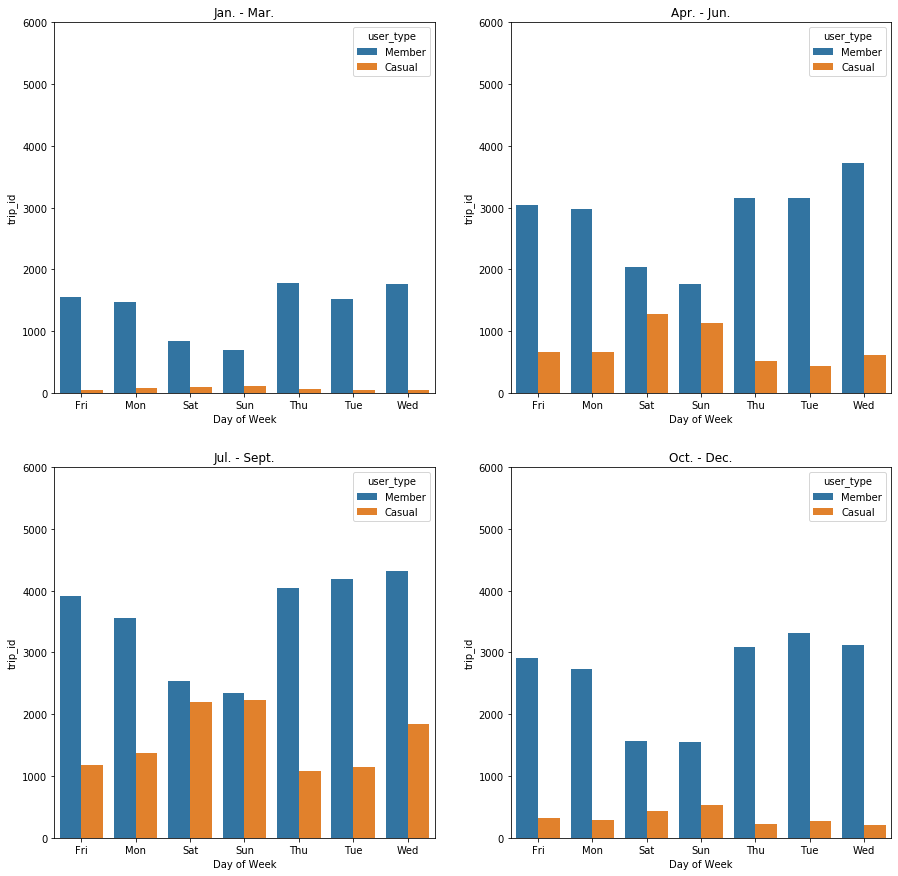

In [141]:
#anlysis of quarter trip
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = np.array(axes).flatten()                                               # Flatten the 2D axes array for ease of looping
quarter_names = ['Jan. - Mar.', 'Apr. - Jun.', 'Jul. - Sept.', 'Oct. - Dec.'] # Prepare the month description titles for each quarter

for q, ax in zip(sorted(ridership['Quarter'].unique()), axes):
    ax.set_title(quarter_names[(q-1)])
    
    # Set the y-axis range for consistency across the four graphs
    ax.set_ylim(0, 6000)
    ax.set_ylabel('Average Daily Trips')
    
    viz = ridership[ridership['Quarter']==q].groupby(['Day of Week', 'user_type'])['trip_id'].mean().reset_index().sort_values('user_type', ascending=False)
    
    sns.barplot(
        x='Day of Week', 
        y='trip_id', 
        hue='user_type', 
        data=viz, 
        ax=ax
    )

plt.show()